In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import jovian

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle
import urllib.request
import opendatasets as od

od.download("https://www.kaggle.com/datasets/georgezwangnottaken/cleaned-data-yoga/data?select=dataset")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 761.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: marcus_zhaojun_hong
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/georgezwangnottaken/cleaned-data-yoga


100%|██████████| 959M/959M [00:14<00:00, 68.0MB/s]


In [ ]:
# Define the path to your dataset
data_dir = '/content/cleaned-data-yoga/dataset'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])

# Load dataset
dataset = datasets.ImageFolder(data_dir, transform=transform)

In [ ]:
# Define the split sizes
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

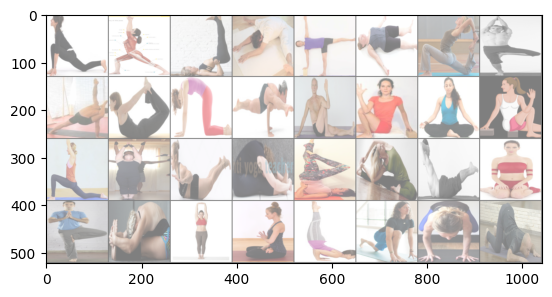

utthita ashwa sanchalanasana virabhadrasana i viparita karani upavistha konasana ardha chandrasana savasana eka pada rajakapotasana ii vriksasana bhairavasana dhanurasana marjaryasana eka pada koundinyanasana i marichyasana iii marichyasana iii sukhasana ardha matsyendrasana anjaneyasana urdhva hastasana salabhasana paschimottanasana salamba sarvangasana parivrtta janu sirsasana makarasana virasana vriksasana paschimottanasana tadasana padmasana ganda bherundasana anjaneyasana bakasana ashtanga namaskara


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{dataset.classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, len(dataset.classes))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import torch.nn.functional as F

num_epochs = 10  # Number of training epochs

for epoch in range(num_epochs):  # Loop over the dataset multiple times
    running_loss = 0.0
    model.train()  # Set the model to training mode

    for i, data in enumerate(train_loader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 4.677


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2, Batch 100, Loss: 3.809
Epoch 3, Batch 100, Loss: 2.582
Epoch 4, Batch 100, Loss: 1.535
Epoch 5, Batch 100, Loss: 0.533
Epoch 6, Batch 100, Loss: 0.131
Epoch 7, Batch 100, Loss: 0.068
Epoch 8, Batch 100, Loss: 0.043
Epoch 9, Batch 100, Loss: 0.016
Epoch 10, Batch 100, Loss: 0.021
Finished Training


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 36.03%
